**Presented by: Tran Thi Hoang Anh**

**Data:**

The data set belongs to a leading online E-Commerce company. An online retail (E commerce) company wants to know the customers who are going to churn, so accordingly they can approach customer to offer some promos.

**Link:** https://www.kaggle.com/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd '/content/drive/MyDrive/1_PYTHON-AI4E/Final Project'
!ls

# Import

In [ ]:
import math
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas import set_option

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import plotly 
plotly.__version__


'5.2.1'

In [ ]:
!pip install plotly --upgrade

In [ ]:
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
from sklearn.utils import class_weight

In [ ]:
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


# Ecommerce Dataset
Description:\
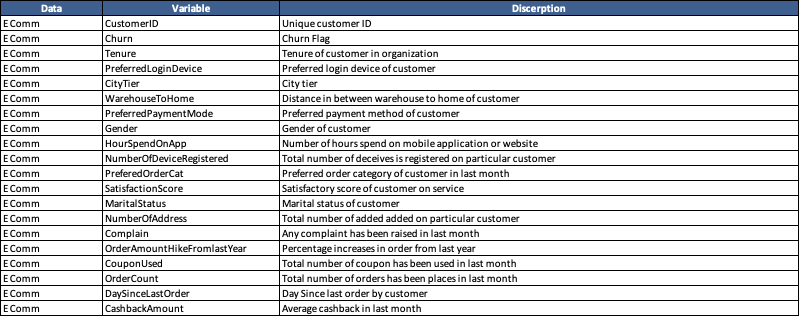

In [ ]:
data = read_csv('Ecomm_churn.csv')

# Understanding Dataset

In [ ]:
print(data.shape)

(5630, 20)


In [ ]:
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [ ]:
# Understand the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
# Summary missing values for each feature
data.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

# EDA

In [ ]:
# Convert customer ID into object

data['CustomerID'] = data['CustomerID'].astype('object')

In [ ]:
# Replace value for some categorical variables
# Churn
ch = {1: 'Client left', 0: 'Client stayed'}
data['Churn'] = data['Churn'].map(ch)
# Complain
cm = {1: 'Yes', 0: 'No'}
data['Complain'] = data['Complain'].map(cm)
# City Tier
tier = {1: 'Tier 1', 2: 'Tier 2', 3:'Tier 3'}
data['CityTier'] = data['CityTier'].map(tier)

In [ ]:
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,Client left,4.0,Mobile Phone,Tier 3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,Yes,11.0,1.0,1.0,5.0,160
1,50002,Client left,NaN,Phone,Tier 1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,Yes,15.0,0.0,1.0,0.0,121
2,50003,Client left,NaN,Phone,Tier 1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,Yes,14.0,0.0,1.0,3.0,120
3,50004,Client left,0.0,Phone,Tier 3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,No,23.0,0.0,1.0,3.0,134
4,50005,Client left,0.0,Phone,Tier 1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,No,11.0,1.0,1.0,3.0,130


In [ ]:
# descriptions
set_option('precision', 3)
print(data.describe().transpose())

                              count     mean     std  ...    50%    75%    max
Tenure                       5366.0   10.190   8.557  ...    9.0   16.0   61.0
WarehouseToHome              5379.0   15.640   8.531  ...   14.0   20.0  127.0
HourSpendOnApp               5375.0    2.932   0.722  ...    3.0    3.0    5.0
NumberOfDeviceRegistered     5630.0    3.689   1.024  ...    4.0    4.0    6.0
SatisfactionScore            5630.0    3.067   1.380  ...    3.0    4.0    5.0
NumberOfAddress              5630.0    4.214   2.584  ...    3.0    6.0   22.0
OrderAmountHikeFromlastYear  5365.0   15.708   3.675  ...   15.0   18.0   26.0
CouponUsed                   5374.0    1.751   1.895  ...    1.0    2.0   16.0
OrderCount                   5372.0    3.008   2.940  ...    2.0    3.0   16.0
DaySinceLastOrder            5323.0    4.543   3.654  ...    3.0    7.0   46.0
CashbackAmount               5630.0  177.221  49.194  ...  163.0  196.0  325.0

[11 rows x 8 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


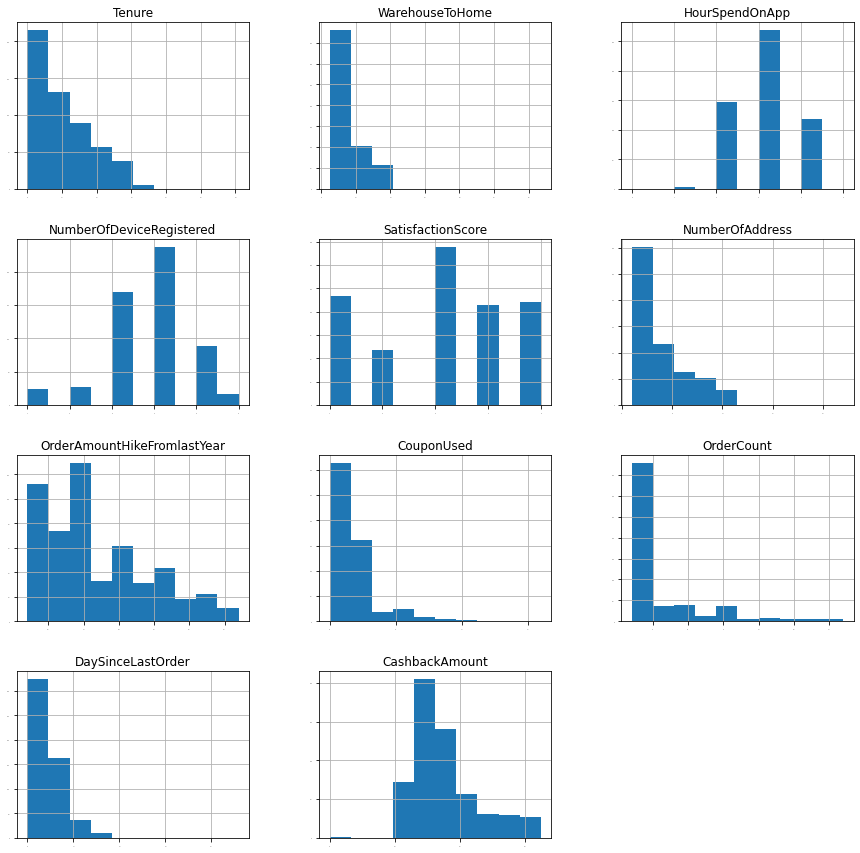

In [ ]:
# Plot histogram for numeric data
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
data.select_dtypes(exclude= 'object').hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, ax=ax)
plt.show()


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


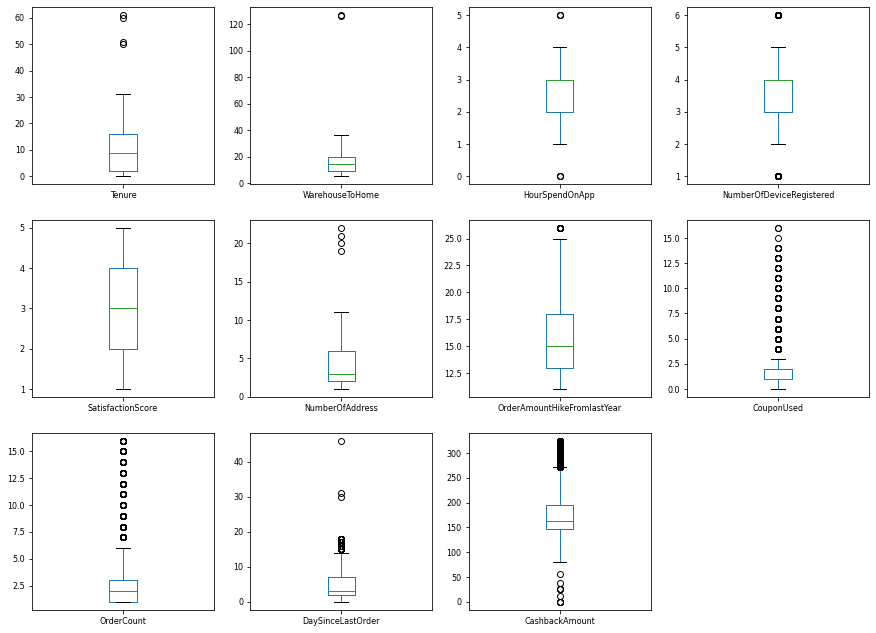

In [ ]:
# Visualize distribution by boxplot
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
data.select_dtypes(exclude= 'object').plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8, ax=ax)
plt.show()

In [ ]:
## Visualize churn
churn = data.groupby('Churn').agg({'Churn': 'count'}).rename(columns = {'Churn': 'count'}).reset_index()
churn

,Churn,count
0,Client left,948
1,Client stayed,4682


In [ ]:
## Visualize churn (pie chart) => imbalance dataset

fig = px.pie(churn, values = churn['count'], names = churn['Churn'])
fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.75, 
                  marker = dict(colors = ['#2A3132','#336B87'], line = dict(color = 'white', width = 2)))

fig.update_layout(title_text = 'Customer churn', title_x = 0.5, title_y = 0.53, title_font_size = 32, title_font_family = 'Arial', title_font_color = 'black',
                  showlegend = False)
                  
fig.show()

## EDA for numeric features

**Comment**:
- *Tenure*:\
Distribution patterns of Client stayed vs. Client left are significantly different.
- *Warehouse to home*:\
Both histograms are right skewed. Historgram for Client Stayed has higher peak.

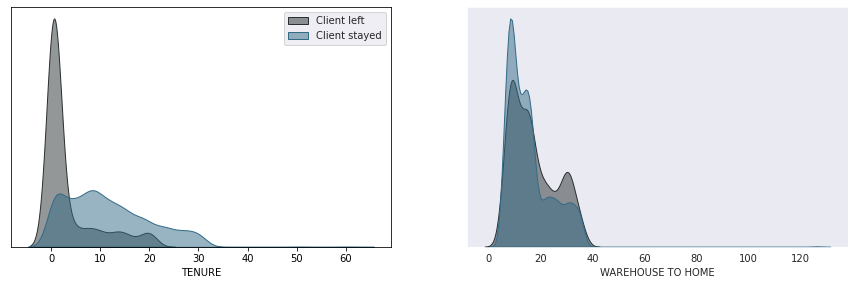

In [ ]:
fig = plt.figure(figsize = (15, 15))
plt.subplot(321)
sns.set_style("dark")
sns.kdeplot(data.query('Churn == "Client left"')['Tenure'], color = '#2A3132', shade = True, label = 'Client left', alpha = 0.5)
sns.kdeplot(data.query('Churn == "Client stayed"')['Tenure'], color = '#336B87', shade = True, label = 'Client stayed', alpha = 0.5)
plt.ylabel('')
plt.xlabel('TENURE')
plt.yticks([])
plt.legend()
######
plt.subplot(322)
sns.set_style("dark")
sns.kdeplot(data.query('Churn == "Client left"')['WarehouseToHome'], color = '#2A3132', shade = True, label = 'Client left', alpha = 0.5)
sns.kdeplot(data.query('Churn == "Client stayed"')['WarehouseToHome'], color = '#336B87', shade = True, label = 'Client stayed', alpha = 0.5)
plt.ylabel('')
plt.xlabel('WAREHOUSE TO HOME')
plt.yticks([])

plt.show()

**Comment**:

- *Hours Spend on App, Number of Devices, Satisfaction Score*:\
Mutiple peaks on histograms, the pattern for 2 groups of clients are quite similar.

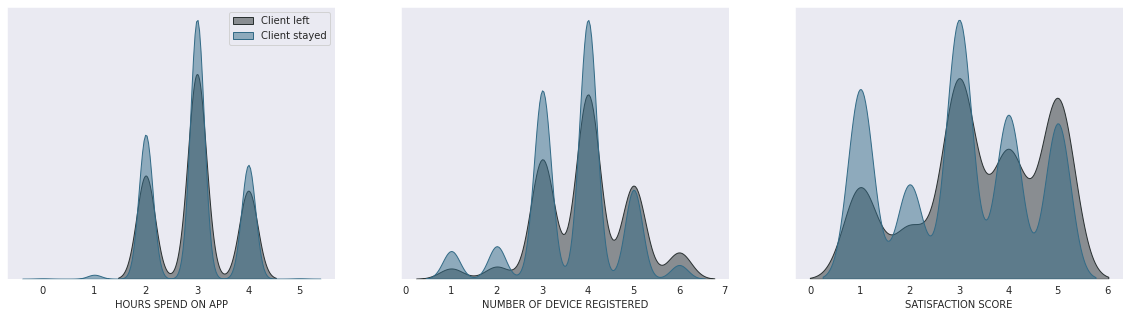

In [ ]:
fig = plt.figure(figsize = (20, 17))
######
plt.subplot(331)
sns.set_style("dark")
sns.kdeplot(data.query('Churn == "Client left"')['HourSpendOnApp'], color = '#2A3132', shade = True, label = 'Client left', alpha = 0.5)
sns.kdeplot(data.query('Churn == "Client stayed"')['HourSpendOnApp'], color = '#336B87', shade = True, label = 'Client stayed', alpha = 0.5)
plt.ylabel('')
plt.xlabel('HOURS SPEND ON APP')
plt.yticks([])
plt.legend()
######
plt.subplot(332)
sns.set_style("dark")
sns.kdeplot(data.query('Churn == "Client left"')['NumberOfDeviceRegistered'], color = '#2A3132', shade = True, label = 'Client left', alpha = 0.5)
sns.kdeplot(data.query('Churn == "Client stayed"')['NumberOfDeviceRegistered'], color = '#336B87', shade = True, label = 'Client stayed', alpha = 0.5)
plt.ylabel('')
plt.xlabel('NUMBER OF DEVICE REGISTERED')
plt.yticks([])
######
plt.subplot(333)
sns.set_style("dark")
sns.kdeplot(data.query('Churn == "Client left"')['SatisfactionScore'], color = '#2A3132', shade = True, label = 'Client left', alpha = 0.5)
sns.kdeplot(data.query('Churn == "Client stayed"')['SatisfactionScore'], color = '#336B87', shade = True, label = 'Client stayed', alpha = 0.5)
plt.ylabel('')
plt.xlabel('SATISFACTION SCORE')
plt.yticks([])
plt.show()

**COMMENT**
- *Number of Address, Last Year Order, Coupon, Order Count, Days Since Last Order, Cashback Amount*:\
Distribution patterns of Client stayed vs. Client left are almost identical.


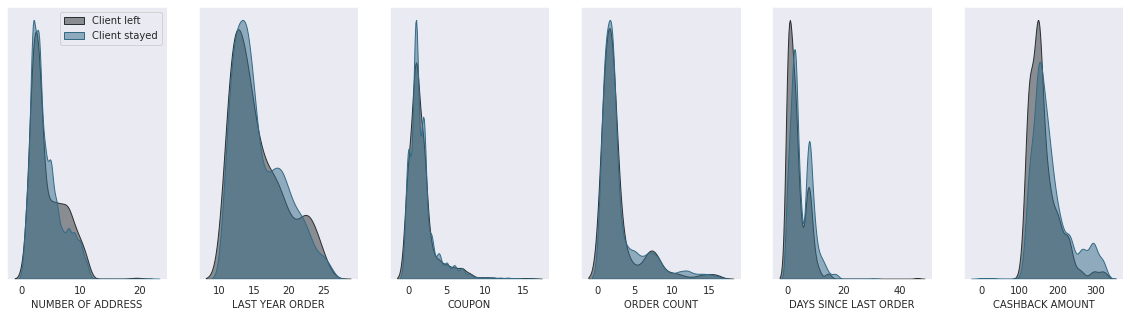

In [ ]:
fig = plt.figure(figsize = (20, 17))

######
plt.subplot(361)
sns.set_style("dark")
sns.kdeplot(data.query('Churn == "Client left"')['NumberOfAddress'], color = '#2A3132', shade = True, label = 'Client left', alpha = 0.5)
sns.kdeplot(data.query('Churn == "Client stayed"')['NumberOfAddress'], color = '#336B87', shade = True, label = 'Client stayed', alpha = 0.5)
plt.ylabel('')
plt.xlabel('NUMBER OF ADDRESS')
plt.yticks([])
plt.legend()
######
plt.subplot(362)
sns.set_style("dark")
sns.kdeplot(data.query('Churn == "Client left"')['OrderAmountHikeFromlastYear'], color = '#2A3132', shade = True, label = 'Client left', alpha = 0.5)
sns.kdeplot(data.query('Churn == "Client stayed"')['OrderAmountHikeFromlastYear'], color = '#336B87', shade = True, label = 'Client stayed', alpha = 0.5)
plt.ylabel('')
plt.xlabel('LAST YEAR ORDER')
plt.yticks([])
###### 
plt.subplot(363)
sns.set_style("dark")
sns.kdeplot(data.query('Churn == "Client left"')['CouponUsed'], color = '#2A3132', shade = True, label = 'Client left', alpha = 0.5)
sns.kdeplot(data.query('Churn == "Client stayed"')['CouponUsed'], color = '#336B87', shade = True, label = 'Client stayed', alpha = 0.5)
plt.ylabel('')
plt.xlabel('COUPON')
plt.yticks([])
######
plt.subplot(3,6,4)
sns.set_style("dark")
sns.kdeplot(data.query('Churn == "Client left"')['OrderCount'], color = '#2A3132', shade = True, label = 'Client left', alpha = 0.5)
sns.kdeplot(data.query('Churn == "Client stayed"')['OrderCount'], color = '#336B87', shade = True, label = 'Client stayed', alpha = 0.5)
plt.ylabel('')
plt.xlabel('ORDER COUNT')
plt.yticks([])
#####
plt.subplot(365)
sns.set_style("dark")
sns.kdeplot(data.query('Churn == "Client left"')['DaySinceLastOrder'], color = '#2A3132', shade = True, label = 'Client left', alpha = 0.5)
sns.kdeplot(data.query('Churn == "Client stayed"')['DaySinceLastOrder'], color = '#336B87', shade = True, label = 'Client stayed', alpha = 0.5)
plt.ylabel('')
plt.xlabel('DAYS SINCE LAST ORDER')
plt.yticks([])
#####
plt.subplot(366)
sns.set_style("dark")
sns.kdeplot(data.query('Churn == "Client left"')['CashbackAmount'], color = '#2A3132', shade = True, label = 'Client left', alpha = 0.5)
sns.kdeplot(data.query('Churn == "Client stayed"')['CashbackAmount'], color = '#336B87', shade = True, label = 'Client stayed', alpha = 0.5)
plt.ylabel('')
plt.xlabel('CASHBACK AMOUNT')
plt.yticks([])

plt.show()


## EDA for categorical features

In [ ]:
# Understand some key features
for i in data.columns:
    if data[i].dtypes == 'object':
        print(i)
        print()
        print('the values are:') 
        print(data[i].value_counts())
        print()
        print()

CustomerID

the values are:
55630    1
51880    1
51872    1
51873    1
51874    1
        ..
53755    1
53756    1
53757    1
53758    1
50001    1
Name: CustomerID, Length: 5630, dtype: int64


Churn

the values are:
Client stayed    4682
Client left       948
Name: Churn, dtype: int64


PreferredLoginDevice

the values are:
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64


CityTier

the values are:
Tier 1    3666
Tier 3    1722
Tier 2     242
Name: CityTier, dtype: int64


PreferredPaymentMode

the values are:
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64


Gender

the values are:
Male      3384
Female    2246
Name: Gender, dtype: int64


PreferedOrderCat

the values are:
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile   

In [ ]:
# REPLACE VALUE IN THE PAYMENT METHOD
## CC -> Credit Card, COD -> Cash on Delivery
data.loc[data.PreferredPaymentMode == "CC", "PreferredPaymentMode"] = "Credit Card"
data.loc[data.PreferredPaymentMode == "COD", "PreferredPaymentMode"] = "Cash on Delivery"

In [ ]:
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,Client left,4.0,Mobile Phone,Tier 3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,Yes,11.0,1.0,1.0,5.0,160
1,50002,Client left,NaN,Phone,Tier 1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,Yes,15.0,0.0,1.0,0.0,121
2,50003,Client left,NaN,Phone,Tier 1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,Yes,14.0,0.0,1.0,3.0,120
3,50004,Client left,0.0,Phone,Tier 3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,No,23.0,0.0,1.0,3.0,134
4,50005,Client left,0.0,Phone,Tier 1,12.0,Credit Card,Male,NaN,3,Mobile,5,Single,3,No,11.0,1.0,1.0,3.0,130


### Demographic:

**Features:**
- Gender
- MaritalStatus
- City Tier

**Comment:**
- The ratio of Customer stayed : Customer left are similar between male and female. (~ 5: 1)


In [ ]:
# Gender: 

gender = data.groupby(['Gender', 'Churn']).agg({'Churn': 'count'}).rename(columns = {'Churn': 'count'}).reset_index()
gender

,Gender,Churn,count
0,Female,Client left,348
1,Female,Client stayed,1898
2,Male,Client left,600
3,Male,Client stayed,2784


In [ ]:
# GENDER
fig = px.sunburst(gender, path = ['Gender', 'Churn'], values = 'count', color = 'Gender', 
                  title = 'Impact of Gender on customer churn',
                 color_discrete_map = {'Male': '#336B87', 'Female': '#2d3033'},
                 width = 600, height = 600)

fig.update_layout(plot_bgcolor = 'white', title_font_family = 'Arial', title_font_color = '#221f1f', title_font_size = 20, title_x = 0.5)
fig.update_traces(textinfo = 'label + percent parent')
fig.show()


**COMMENT**
- The ratio of Customer stayed : Customer left are similar between Divorce and Married (~ 5: 1), 
- The ratio is lower in Single customers (3: 1).

In [ ]:
# Maritial Status
# The ration of Customer stayed : Customer left are similar between Divorce and Married, and slightly lower in Single customers.
married = data.groupby(['MaritalStatus', 'Churn']).agg({'Churn': 'count'}).rename(columns = {'Churn': 'count'}).reset_index()
married


,MaritalStatus,Churn,count
0,Divorced,Client left,124
1,Divorced,Client stayed,724
2,Married,Client left,344
3,Married,Client stayed,2642
4,Single,Client left,480
5,Single,Client stayed,1316


In [ ]:
# Maritial Status - Visualization
fig = px.sunburst(married, path = ['MaritalStatus', 'Churn'], values = 'count', color = 'MaritalStatus', title = 'Impact of Maritial Status on customer churn',
                 color_discrete_map = {'Married': '#336B87', 'Divorced': '#2A3132'},
                 width = 600, height = 600)

fig.update_layout(plot_bgcolor = 'white', title_font_family = 'Arial', title_font_color = '#221f1f', title_font_size = 20, title_x = 0.5)

fig.update_traces(textinfo = 'label + percent parent')
fig.show()

**Comment**

Population of the city can affect churn rate.

Trend: Higher population, higher ratio Customer stayed : Customer left

- Tier 1: 5: 1
- Tier 2, Tier 3: ~ 4:1

In [ ]:
# City Tier
city = data.groupby(['CityTier', 'Churn']).agg({'Churn': 'count'}).rename(columns = {'Churn': 'count'}).reset_index()
city

,CityTier,Churn,count
0,Tier 1,Client left,532
1,Tier 1,Client stayed,3134
2,Tier 2,Client left,48
3,Tier 2,Client stayed,194
4,Tier 3,Client left,368
5,Tier 3,Client stayed,1354


In [ ]:
fig = px.sunburst(city, path = ['CityTier', 'Churn'], values = 'count', color = 'CityTier',
                  title = 'Impact of city on customer churn',
                 color_discrete_map = {'Tier 1': '#336B87', 'Tier 2': '#2A3132'},
                 width = 600, height = 600)

fig.update_layout(plot_bgcolor = 'white', title_font_family = 'Arial', title_font_color = '#221f1f', title_font_size = 20, title_x = 0.5)

fig.update_traces(textinfo = 'label + percent parent')
fig.show()

### Preference:
Features: 

- Prefered Login Device
- Prefered Order Category
- Preferred Payment Mode
- Complain


In [ ]:
# Prefered Login Device
log_dv = data.groupby(['PreferredLoginDevice', 'Churn']).agg({'Churn': 'count'}).rename(columns = {'Churn': 'count'}).reset_index()
log_dv

,PreferredLoginDevice,Churn,count
0,Computer,Client left,324
1,Computer,Client stayed,1310
2,Mobile Phone,Client left,348
3,Mobile Phone,Client stayed,2417
4,Phone,Client left,276
5,Phone,Client stayed,955


**Comment**
- Popularity of device used: Mobile phone > Computer > Phone
- The ratio of Client stayed : Client left
- Mobile phone has highest retention (7:1)
- Computer and phone share similar pattern (~3:1)

In [ ]:
fig = px.sunburst(log_dv, path = ['PreferredLoginDevice', 'Churn'], values = 'count', color = 'PreferredLoginDevice', 
                  title = 'Impact of Prefered Login Device on customer churn',
                 color_discrete_map = {'Computer': '#336B87', 'Mobile Phone': '#2A3132'},
                 width = 600, height = 600)

fig.update_layout(plot_bgcolor = 'white', title_font_family = 'Arial', title_font_color = '#221f1f', title_font_size = 22, title_x = 0.5)

fig.update_traces(textinfo = 'label + percent parent')
                  
fig.show()

In [ ]:
# Prefered Order Category
order = data.groupby(['PreferedOrderCat', 'Churn']).agg({'Churn': 'count'}).rename(columns = {'Churn': 'count'}).reset_index()
order

,PreferedOrderCat,Churn,count
0,Fashion,Client left,128
1,Fashion,Client stayed,698
2,Grocery,Client left,20
3,Grocery,Client stayed,390
4,Laptop & Accessory,Client left,210
5,Laptop & Accessory,Client stayed,1840
6,Mobile,Client left,220
7,Mobile,Client stayed,589
8,Mobile Phone,Client left,350
9,Mobile Phone,Client stayed,921


**Comment:**

- Higher retention for low-value or non-durable purchases, such as: Grocery, Others. (> 90% clien stayed)
- Lower retention for high-value purchases such as mobile and mobile phone, or fashion (> 70% client stayed)
- Exception: Laptop & Accesocies: more likely client will stay.

In [ ]:
fig = px.sunburst(order, path = ['PreferedOrderCat', 'Churn'], values = 'count', color = 'PreferedOrderCat',
                title = 'Impact of Prefered Order category on customer churn',
                 color_discrete_sequence= px.colors.sequential.Viridis,
                 width = 600, height = 600)

fig.update_layout(plot_bgcolor = 'white', title_font_family = 'Arial', title_font_color = '#221f1f', title_font_size = 22, title_x = 0.5)

fig.update_traces(textinfo = 'label + percent parent')
                  
fig.show()

In [ ]:
# Preferred Payment Mode
pm_mode = data.groupby(['PreferredPaymentMode', 'Churn']).agg({'Churn': 'count'}).rename(columns = {'Churn': 'count'}).reset_index()
pm_mode

,PreferredPaymentMode,Churn,count
0,Cash on Delivery,Client left,128
1,Cash on Delivery,Client stayed,386
2,Credit Card,Client left,252
3,Credit Card,Client stayed,1522
4,Debit Card,Client left,356
5,Debit Card,Client stayed,1958
6,E wallet,Client left,140
7,E wallet,Client stayed,474
8,UPI,Client left,72
9,UPI,Client stayed,342


**Comment**:
- High retention for: Debit card and Credit Card (> 85% client stayed), and UPI
- Lower retention for E-Wallet and COD (Client stayed : Client left ~ 3:1)

In [ ]:
fig = px.sunburst(pm_mode, path = ['PreferredPaymentMode', 'Churn'], values = 'count', color = 'PreferredPaymentMode', 
                  title = 'Impact of Prefered Payment Mode on customer churn', 
                  color_discrete_sequence= px.colors.sequential.Viridis, width = 600, height = 600)

fig.update_layout(plot_bgcolor = 'white', title_font_family = 'Arial', title_font_color = '#221f1f', title_font_size = 22, title_x = 0.5)

fig.update_traces(textinfo = 'label + percent parent')
                  
fig.show()

In [ ]:
# COMPLAIN
complain = data.groupby(['Complain', 'Churn']).agg({'Churn': 'count'}).rename(columns = {'Churn': 'count'}).reset_index()
complain

,Complain,Churn,count
0,No,Client left,440
1,No,Client stayed,3586
2,Yes,Client left,508
3,Yes,Client stayed,1096


**Comment:**

- If there was NO complain, customers will morelikely to stay. (~ 90% client stayed)

- If there is complain in the last month, ratio of Client stayed : Client left is significantly lower (2:1)

In [ ]:
fig = px.sunburst(complain, path = ['Complain', 'Churn'], values = 'count', color = 'Complain', 
                  title = 'Impact of Complaint on customer churn',
                 color_discrete_map = {'No': '#336B87', 'Yes': '#2d3033'},
                 width = 600, height = 600)

fig.update_layout(plot_bgcolor = 'white', title_font_family = 'Arial', title_font_color = '#221f1f', title_font_size = 22, title_x = 0.5)

fig.update_traces(textinfo = 'label + percent parent')
                  
fig.show()

# Pre-Processing

In [ ]:
# Switch column Churn to the last position
cols = list(data)
cols[1], cols[-1] = cols[-1], cols[1]
cols

['CustomerID',
 'CashbackAmount',
 'Tenure',
 'PreferredLoginDevice',
 'CityTier',
 'WarehouseToHome',
 'PreferredPaymentMode',
 'Gender',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'PreferedOrderCat',
 'SatisfactionScore',
 'MaritalStatus',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'Churn']

In [ ]:
data = data[cols]

In [ ]:
data.head()

,CustomerID,CashbackAmount,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,Churn
0,50001,160,4.0,Mobile Phone,Tier 3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,Yes,11.0,1.0,1.0,5.0,Client left
1,50002,121,NaN,Phone,Tier 1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,Yes,15.0,0.0,1.0,0.0,Client left
2,50003,120,NaN,Phone,Tier 1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,Yes,14.0,0.0,1.0,3.0,Client left
3,50004,134,0.0,Phone,Tier 3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,No,23.0,0.0,1.0,3.0,Client left
4,50005,130,0.0,Phone,Tier 1,12.0,Credit Card,Male,NaN,3,Mobile,5,Single,3,No,11.0,1.0,1.0,3.0,Client left


In [ ]:
X = data.drop(['Churn', 'CustomerID'], axis = 1)
Y = data['Churn']
num_cols = X.select_dtypes(include = ['int64', 'float64']).columns.to_list()
cat_cols = X.select_dtypes(include = ['object']).columns.to_list()

In [ ]:
enc = OrdinalEncoder()
X[cat_cols] = enc.fit_transform(X[cat_cols])

In [ ]:
X.head()

,CashbackAmount,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder
0,160,4.0,1.0,2.0,6.0,2.0,0.0,3.0,3,2.0,2,2.0,9,1.0,11.0,1.0,1.0,5.0
1,121,NaN,2.0,0.0,8.0,4.0,1.0,3.0,4,3.0,3,2.0,7,1.0,15.0,0.0,1.0,0.0
2,120,NaN,2.0,0.0,30.0,2.0,1.0,2.0,4,3.0,3,2.0,6,1.0,14.0,0.0,1.0,3.0
3,134,0.0,2.0,2.0,15.0,2.0,1.0,2.0,4,2.0,5,2.0,8,0.0,23.0,0.0,1.0,3.0
4,130,0.0,2.0,0.0,12.0,1.0,1.0,NaN,3,3.0,5,2.0,3,0.0,11.0,1.0,1.0,3.0


In [ ]:
# Recode Churn into numeric data
Y = Y.map({'Client left':1 , 'Client stayed':0})

In [ ]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn, dtype: int64

In [ ]:
# Fill null value in features with median value
X = X.apply(lambda x: x.fillna(x.median()),axis=0)

In [ ]:
X.head()

,CashbackAmount,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder
0,160,4.0,1.0,2.0,6.0,2.0,0.0,3.0,3,2.0,2,2.0,9,1.0,11.0,1.0,1.0,5.0
1,121,9.0,2.0,0.0,8.0,4.0,1.0,3.0,4,3.0,3,2.0,7,1.0,15.0,0.0,1.0,0.0
2,120,9.0,2.0,0.0,30.0,2.0,1.0,2.0,4,3.0,3,2.0,6,1.0,14.0,0.0,1.0,3.0
3,134,0.0,2.0,2.0,15.0,2.0,1.0,2.0,4,2.0,5,2.0,8,0.0,23.0,0.0,1.0,3.0
4,130,0.0,2.0,0.0,12.0,1.0,1.0,3.0,3,3.0,5,2.0,3,0.0,11.0,1.0,1.0,3.0


In [ ]:
# Scale data for numeric features
sc = StandardScaler()
X[num_cols] = sc.fit_transform(X[num_cols])

# Building Model
- Logistic Regression
- Random Forest
- SVM

In [ ]:
X

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 22)

In [ ]:
x_train.shape, x_test.shape

((4504, 18), (1126, 18))

In [ ]:
y_train

In [ ]:
target_names = ['Client stayed','Client left'] # Set target labels: 0 - clien stayed; 1-  client left

#1. Default hyperparmeters on all features


##1.1 Logistic Regression

In [ ]:
# Training
clf = LogisticRegression(random_state = 22).fit(x_train, y_train)

In [ ]:
clf.classes_

array([0, 1])

In [ ]:
# Testing
y_pred_lg = clf.predict(x_test)

In [ ]:
# Accuracy
score = clf.score(x_test, y_test)
score

0.8579040852575488

In [ ]:
# Metrics
lg_report = classification_report(y_test, y_pred_lg, target_names=target_names)
print(lg_report)

               precision    recall  f1-score   support

Client stayed       0.88      0.96      0.92       912
  Client left       0.71      0.43      0.53       214

     accuracy                           0.86      1126
    macro avg       0.79      0.69      0.72      1126
 weighted avg       0.85      0.86      0.84      1126



In [ ]:
# Confusion matrix
cm = metrics.confusion_matrix(y_true=y_test, 
                         y_pred = y_pred_lg, 
                        labels = clf.classes_)
cm

array([[875,  37],
       [123,  91]])

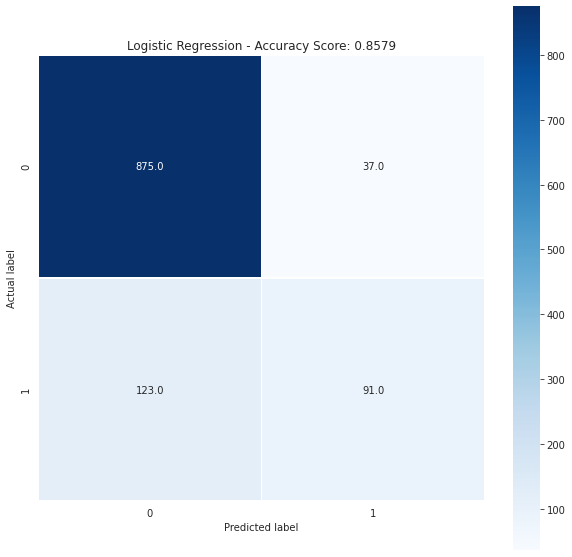

In [ ]:
# Visualize confusion matrix

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".1f", 
            linewidths=.5, square = True, cmap = 'Blues');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = f'Logistic Regression - Accuracy Score: {score:.4f}'
plt.title(all_sample_title);

In [ ]:
# Feature importance
f_imp = pd.DataFrame(columns = ['feature', 'importance (abs coef)'], index = range(18))
for i in range(len(f_imp.index)):
    f_imp.iloc[i, 0] = x_train.columns.to_list()[i]
f_imp['importance (abs coef)'] = abs(clf.coef_)[0]
f_imp = f_imp.sort_values('importance (abs coef)', ascending = False)
f_imp[0:18].style.background_gradient(cmap = 'Blues')

,feature,importance (abs coef)
13,Complain,1.628
1,Tenure,1.578
11,MaritalStatus,0.513
17,DaySinceLastOrder,0.510
12,NumberOfAddress,0.489
16,OrderCount,0.431
10,SatisfactionScore,0.381
3,CityTier,0.338
8,NumberOfDeviceRegistered,0.337
6,Gender,0.294


##1.2 Random Forest - Max_depth = 5

In [ ]:
# Training
rf = RandomForestClassifier(random_state = 22, max_depth = 5)
rf.fit(x_train, y_train)
# Testing
y_pred_rf = rf.predict(x_test)

In [ ]:
score2 = rf.score(x_test, y_test)
score2

0.8596802841918295

In [ ]:
# Metrics
rf_report = classification_report(y_test, y_pred_rf, target_names=target_names)
print(rf_report)

               precision    recall  f1-score   support

Client stayed       0.86      0.98      0.92       912
  Client left       0.80      0.35      0.48       214

     accuracy                           0.86      1126
    macro avg       0.83      0.66      0.70      1126
 weighted avg       0.85      0.86      0.84      1126



In [ ]:
rf.classes_

array([0, 1])

In [ ]:
# Confusion Matrix

cm2 = metrics.confusion_matrix(y_true=y_test, 
                         y_pred = y_pred_rf, 
                        labels = rf.classes_)
cm2

array([[894,  18],
       [140,  74]])

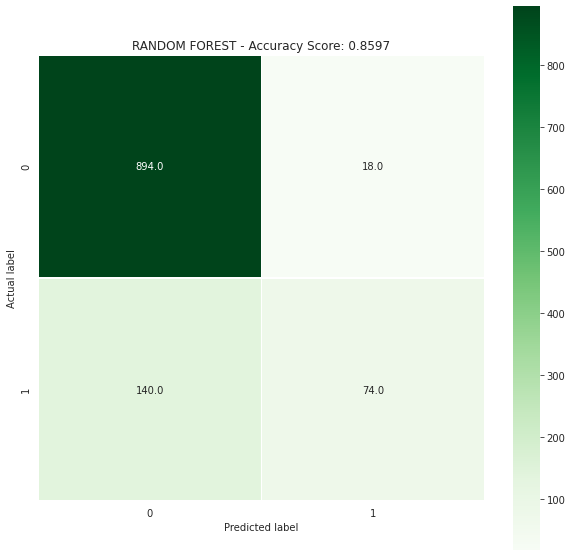

In [ ]:
# Visualize confusion matrix

plt.figure(figsize=(10,10))
sns.heatmap(cm2, annot=True, fmt=".1f",
            linewidths=.5, square = True, cmap = 'Greens');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = f'RANDOM FOREST - Accuracy Score: {score2:.4f}'
plt.title(all_sample_title);

In [ ]:
# Feature importance
f_imp2 = pd.DataFrame(columns = ['feature', 'importance'], index = range(18))
for i in range(len(f_imp2.index)):
    f_imp2.iloc[i, 0] = x_train.columns.to_list()[i]
f_imp2['importance'] = rf.feature_importances_
f_imp2 = f_imp2.sort_values('importance', ascending = False)
f_imp2[0:18].style.background_gradient(cmap = 'Greens')

,feature,importance
1,Tenure,0.452
13,Complain,0.124
0,CashbackAmount,0.062
17,DaySinceLastOrder,0.061
11,MaritalStatus,0.052
12,NumberOfAddress,0.047
9,PreferedOrderCat,0.045
4,WarehouseToHome,0.028
8,NumberOfDeviceRegistered,0.028
10,SatisfactionScore,0.020


## 1.3 SVM - kernel: linear


In [ ]:
from sklearn.svm import SVC

In [ ]:
# Training
svm = SVC(kernel='linear') # Later on using coefs for evaluation feature importance
svm.fit(x_train, y_train)
# Testing
y_pred_svm = svm.predict(x_test)

In [ ]:
# Accuracy

score3 = svm.score(x_test, y_test)
score3

0.8552397868561279

In [ ]:
# Metrics

svm_report = classification_report(y_test, y_pred_svm, target_names=target_names)
print(svm_report)

               precision    recall  f1-score   support

Client stayed       0.87      0.96      0.91       912
  Client left       0.71      0.40      0.51       214

     accuracy                           0.86      1126
    macro avg       0.79      0.68      0.71      1126
 weighted avg       0.84      0.86      0.84      1126



In [ ]:
# Confusion Matrix

cm3 = metrics.confusion_matrix(y_true=y_test, 
                         y_pred = y_pred_svm, 
                        labels = svm.classes_)
cm3

array([[877,  35],
       [128,  86]])

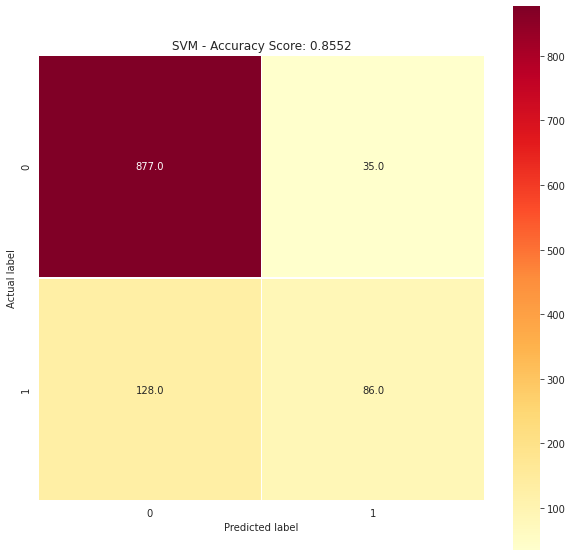

In [ ]:
# Visualize confusion matrix

plt.figure(figsize=(10,10))
sns.heatmap(cm3, annot=True, fmt=".1f",
            linewidths=.5, square = True, cmap = 'YlOrRd');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = f'SVM - Accuracy Score: {score3:.4f}'
plt.title(all_sample_title);

In [ ]:
# Feature importance: for SVM with linear kernel: attribute coef_

f_imp3 = pd.DataFrame(columns = ['feature', 'importance (abs coef)'], index = range(18))
for i in range(len(f_imp3.index)):
    f_imp3.iloc[i, 0] = x_train.columns.to_list()[i]
f_imp3['importance (abs coef)'] = abs(svm.coef_)[0]
f_imp3 = f_imp3.sort_values('importance (abs coef)', ascending = False)
f_imp3[0:18].style.background_gradient(cmap = 'YlOrRd')

,feature,importance (abs coef)
13,Complain,1.054
1,Tenure,1.000
11,MaritalStatus,0.381
12,NumberOfAddress,0.330
17,DaySinceLastOrder,0.299
16,OrderCount,0.268
10,SatisfactionScore,0.264
3,CityTier,0.211
8,NumberOfDeviceRegistered,0.203
4,WarehouseToHome,0.186


# 2. Dropping non-significance features

Based on EDA and feature importance evaluation from 3 models above, following features can be removed:

- PreferPaymentMode
- Gender
- CashbackAmount
- CouponUsed
- OrderAmountHikeFromlasyear

In [ ]:
X1 = X.drop(['Gender', 'CashbackAmount', 'CouponUsed', 'OrderAmountHikeFromlastYear','PreferredPaymentMode'], axis = 1)

In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(X1, Y, test_size = 0.2, random_state = 22)

In [ ]:
x1_train.shape, x1_test.shape

((4504, 13), (1126, 13))

##2.1 Logistic Regression

In [ ]:
# Logistics Regression - Drop features
lg_new = LogisticRegression(random_state = 22).fit(x1_train, y1_train)
# Testing
y1_pred = lg_new.predict(x1_test)

In [ ]:
score1_new = lg_new.score(x1_test, y1_test)
score1_new

0.8561278863232682

In [ ]:
# Metrics
lg_drop_report = classification_report(y1_test, y1_pred, target_names=target_names)
print(lg_drop_report)

               precision    recall  f1-score   support

Client stayed       0.88      0.96      0.92       912
  Client left       0.70      0.42      0.53       214

     accuracy                           0.86      1126
    macro avg       0.79      0.69      0.72      1126
 weighted avg       0.84      0.86      0.84      1126



##2.2 Random Forest

In [ ]:
# Random Forest - Drop features
# Training
rf_drop = RandomForestClassifier(random_state = 22, max_depth = 5)
rf_drop.fit(x1_train, y1_train)
# Testing
y1_drop = rf_drop.predict(x1_test)

In [ ]:
score2_new = rf_drop.score(x1_test, y1_test)
score2_new

0.8623445825932504

In [ ]:
#Metricd
rf_drop_rport = classification_report(y1_test, y1_drop, target_names=target_names)
print(rf_drop_rport)

               precision    recall  f1-score   support

Client stayed       0.86      0.98      0.92       912
  Client left       0.83      0.35      0.49       214

     accuracy                           0.86      1126
    macro avg       0.85      0.66      0.70      1126
 weighted avg       0.86      0.86      0.84      1126



##2.3 SVM

In [ ]:
# SVM
# Training
svm_drop = SVC(kernel='linear')
svm_drop.fit(x1_train, y1_train)
# Testing
y1_svm_drop = svm_drop.predict(x1_test)

In [ ]:
# Metrics
score3_new = svm_drop.score(x1_test, y1_test)
score3_new

0.8534635879218473

In [ ]:
svm_drop_report = classification_report(y1_test, y1_svm_drop, target_names=target_names)
print(svm_drop_report)

               precision    recall  f1-score   support

Client stayed       0.87      0.96      0.91       912
  Client left       0.70      0.40      0.51       214

     accuracy                           0.85      1126
    macro avg       0.79      0.68      0.71      1126
 weighted avg       0.84      0.85      0.84      1126



#3. Set classweight in models (after dropping features)


In [ ]:
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y1_train),
                                                 y1_train)
class_weights

array([0.59734748, 3.06811989])

In [ ]:
weight = dict(enumerate(class_weights))
weight

{0: 0.5973474801061008, 1: 3.068119891008174}

##3.1 Logistic Regression

In [ ]:
# Logistics Regression - Drop features + Classweight
lg_w = LogisticRegression(random_state = 22,class_weight=weight).fit(x1_train, y1_train)
# Testing
y1_lgw = lg_w.predict(x1_test)

In [ ]:
# Accuracy
score1_w = lg_w.score(x1_test, y1_test)
score1_w

0.7646536412078153

In [ ]:
# Metrics
lg_weight_report = classification_report(y1_test, y1_lgw, target_names=target_names)
print(lg_weight_report)

               precision    recall  f1-score   support

Client stayed       0.95      0.75      0.84       912
  Client left       0.44      0.82      0.57       214

     accuracy                           0.76      1126
    macro avg       0.69      0.79      0.70      1126
 weighted avg       0.85      0.76      0.79      1126



##3.2 Random Forest

In [ ]:
# Random Forest - Drop features + Classweight
# Training
rf_w = RandomForestClassifier(random_state = 22, max_depth = 5, class_weight=weight)
rf_w.fit(x1_train, y1_train)
# Testing
y1_rfw = rf_w.predict(x1_test)

In [ ]:
# Accuracy
score2_w = lg_w.score(x1_test, y1_test)
score2_w

0.7646536412078153

In [ ]:
# Metrics
rf_weight_report = classification_report(y1_test, y1_rfw, target_names=target_names)
print(rf_weight_report)

               precision    recall  f1-score   support

Client stayed       0.95      0.84      0.89       912
  Client left       0.55      0.81      0.65       214

     accuracy                           0.84      1126
    macro avg       0.75      0.83      0.77      1126
 weighted avg       0.87      0.84      0.85      1126



##3.3 SVM

In [ ]:
# SVM - Drop features + Classweight
# Training
svm_w = SVC(kernel='linear', class_weight=weight)
svm_w.fit(x1_train, y1_train)
# Testing
y1_w = svm_w.predict(x1_test)

In [ ]:
# Metrics
score3_w = svm_w.score(x1_test, y1_test)
score3_w

0.7726465364120781

In [ ]:
# Metrics
svm_weight_report = classification_report(y1_test, y1_w, target_names=target_names)
print(svm_weight_report)

               precision    recall  f1-score   support

Client stayed       0.95      0.76      0.84       912
  Client left       0.45      0.83      0.58       214

     accuracy                           0.77      1126
    macro avg       0.70      0.79      0.71      1126
 weighted avg       0.85      0.77      0.79      1126



#4. Tuning Models after dropping non-ensential features

##4.1 Tuning Random Forest

In [ ]:
param_grid = { 
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_rf = GridSearchCV(estimator= rf_drop, param_grid=param_grid, cv= 5)
CV_rf.fit(x1_train, y1_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=22,
                                     

In [ ]:
CV_rf.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [ ]:
# Training - Random Forest : 'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500

rf_tune = RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=8, criterion='gini')

In [ ]:
rf_tune.fit(x1_train, y1_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
# Testing - Random Forest After tuning
rf_pred = rf_tune.predict(x1_test)

In [ ]:
# Metrics - Random Forest After tuning

score_rf = rf_tune.score(x1_test, y1_test)
score_rf

0.9103019538188277

In [ ]:
rf_tune_report = classification_report(y1_test, rf_pred, target_names=target_names)
print(rf_tune_report)

               precision    recall  f1-score   support

Client stayed       0.92      0.98      0.95       912
  Client left       0.87      0.62      0.72       214

     accuracy                           0.91      1126
    macro avg       0.89      0.80      0.84      1126
 weighted avg       0.91      0.91      0.90      1126



In [ ]:
rf_tune.classes_

array([0, 1])

In [ ]:
# Confusion Matrix - Random Forest After tuning

cm_rf_tune = metrics.confusion_matrix(y_true=y1_test, 
                         y_pred = rf_pred, 
                        labels = rf_tune.classes_)
cm_rf_tune

array([[892,  20],
       [ 81, 133]])

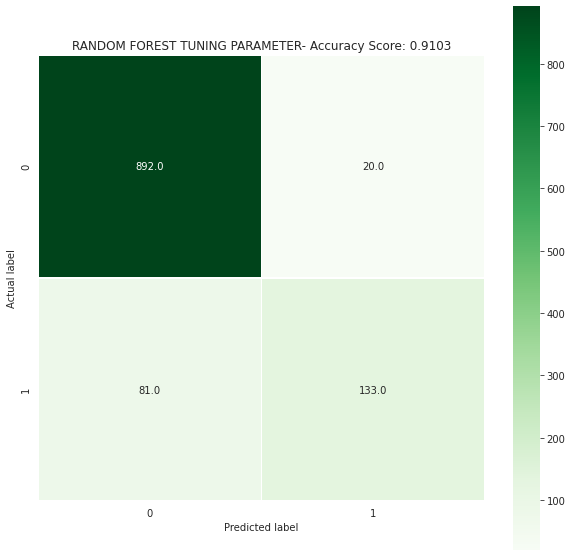

In [ ]:
# Visualize confusion matrix - Random Forest After tuning

plt.figure(figsize=(10,10))
sns.heatmap(cm_rf_tune, annot=True, fmt=".1f",
            linewidths=.5, square = True, cmap = 'Greens');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = f'RANDOM FOREST TUNING PARAMETER- Accuracy Score: {score_rf:.4f}'
plt.title(all_sample_title);

In [ ]:
# Feature importance
f_imp_rf = pd.DataFrame(columns = ['feature', 'importance'], index = range(13))
for i in range(len(f_imp_rf.index)):
    f_imp_rf.iloc[i, 0] = x1_train.columns.to_list()[i]
f_imp_rf['importance'] = rf_tune.feature_importances_
f_imp_rf = f_imp_rf.sort_values('importance', ascending = False)
f_imp_rf[0:13].style.background_gradient(cmap = 'Greens')

,feature,importance
0,Tenure,0.358
10,Complain,0.093
9,NumberOfAddress,0.079
12,DaySinceLastOrder,0.079
3,WarehouseToHome,0.075
6,PreferedOrderCat,0.066
7,SatisfactionScore,0.050
8,MaritalStatus,0.048
5,NumberOfDeviceRegistered,0.044
11,OrderCount,0.036


##4.2 Tuning SVM

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

In [ ]:
CV_svm = GridSearchCV(SVC(),param_grid=param_grid,verbose=2)
CV_svm.fit(x1_train,y1_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] C=0.1, gamma=scale, kernel=linear ...............................
[CV] ................ C=0.1, gamma=scale, kernel=linear, total=   0.1s
[CV] C=0.1, gamma=scale, kernel=linear ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ................ C=0.1, gamma=scale, kernel=linear, total=   0.1s
[CV] C=0.1, gamma=scale, kernel=linear ...............................
[CV] ................ C=0.1, gamma=scale, kernel=linear, total=   0.1s
[CV] C=0.1, gamma=scale, kernel=linear ...............................
[CV] ................ C=0.1, gamma=scale, kernel=linear, total=   0.1s
[CV] C=0.1, gamma=scale, kernel=linear ...............................
[CV] ................ C=0.1, gamma=scale, kernel=linear, total=   0.1s
[CV] C=0.1, gamma=scale, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=scale, kernel=rbf, total=   0.3s
[CV] C=0.1, gamma=scale, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=scale, kernel=rbf, total=   0.3s
[CV] C=0.1, gamma=scale, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=scale, kernel=rbf, total=   0.3s
[CV] C=0.1, gamma=scale, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:  2.2min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [ ]:
CV_svm.best_params_

{'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}

In [ ]:
# Training - SVM best: 'C': 100, 'gamma': 'auto', 'kernel': 'rbf'

svm_tune = SVC(C=100, gamma='auto', kernel='rbf')

In [ ]:
svm_tune.fit(x1_train, y1_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Testing SVM After Tuning
svm_pred = svm_tune.predict(x1_test)

In [ ]:
# Metrics - SVM After Tuning

score_svm = svm_tune.score(x1_test, y1_test)
score_svm

0.9431616341030196

In [ ]:
svm_tune_report = classification_report(y1_test, rf_pred, target_names=target_names)
print(svm_tune_report)

               precision    recall  f1-score   support

Client stayed       0.92      0.98      0.95       912
  Client left       0.87      0.62      0.72       214

     accuracy                           0.91      1126
    macro avg       0.89      0.80      0.84      1126
 weighted avg       0.91      0.91      0.90      1126



In [ ]:
svm_tune.classes_

array([0, 1])

In [ ]:
# Confusion Matrix - SVM After Tuning

cm_svm_tune = metrics.confusion_matrix(y_true=y1_test, 
                         y_pred = svm_pred, 
                        labels = svm_tune.classes_)
cm_svm_tune

array([[878,  34],
       [ 30, 184]])

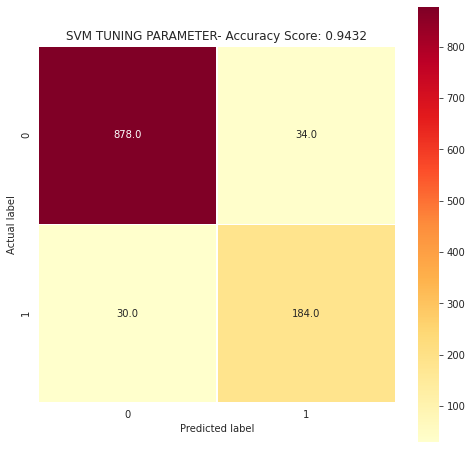

In [ ]:
# Visualize confusion matrix - SVM After Tuning

plt.figure(figsize=(8,8))
sns.heatmap(cm_svm_tune, annot=True, fmt=".1f",
            linewidths=.5, square = True, cmap = 'YlOrRd');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = f'SVM TUNING PARAMETER- Accuracy Score: {score_svm:.4f}'
plt.title(all_sample_title);

#5. FINAL MODEL: Drop non-ensential features + Tuning + Classweight

##5.1 Random Forest - Final

In [ ]:
# Training - Random Forest : 'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500, Classweight

rf_final = RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=8, criterion='gini', class_weight=weight)

In [ ]:
rf_final.fit(x1_train, y1_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.5973474801061008,
                                     1: 3.068119891008174},
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
# Testing - Random Forest Final
y_rf = rf_final.predict(x1_test)

In [ ]:
# Metrics - Random Forest Final

score_rf_final = rf_final.score(x1_test, y1_test)
score_rf_final

0.8969804618117229

In [ ]:
rf_final_report = classification_report(y1_test, y_rf, target_names=target_names)
print(rf_final_report)

               precision    recall  f1-score   support

Client stayed       0.96      0.91      0.93       912
  Client left       0.69      0.83      0.75       214

     accuracy                           0.90      1126
    macro avg       0.82      0.87      0.84      1126
 weighted avg       0.91      0.90      0.90      1126



In [ ]:
rf_final.classes_

array([0, 1])

In [ ]:
# Confusion Matrix - Random Forest After tuning

cm_rf_final = metrics.confusion_matrix(y_true=y1_test, 
                         y_pred = y_rf, 
                        labels = rf_final.classes_)
cm_rf_final

array([[833,  79],
       [ 37, 177]])

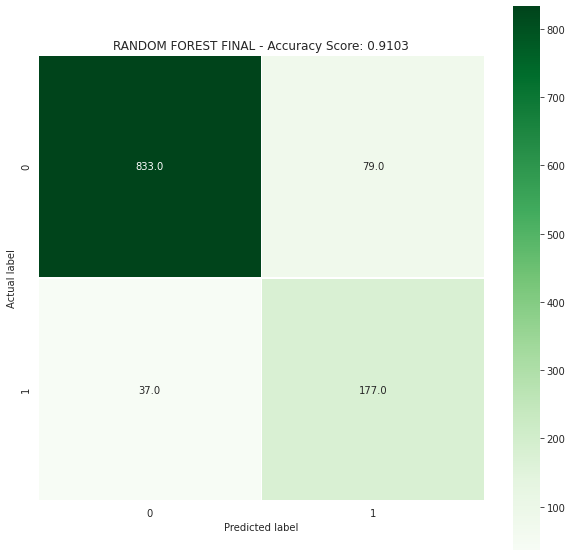

In [ ]:
# Visualize confusion matrix - Final

plt.figure(figsize=(10,10))
sns.heatmap(cm_rf_final, annot=True, fmt=".1f",
            linewidths=.5, square = True, cmap = 'Greens');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = f'RANDOM FOREST FINAL - Accuracy Score: {score_rf:.4f}'
plt.title(all_sample_title);

In [ ]:
# Feature importance - Final
f_imp_rf = pd.DataFrame(columns = ['feature', 'importance'], index = range(13))
for i in range(len(f_imp_rf.index)):
    f_imp_rf.iloc[i, 0] = x1_train.columns.to_list()[i]
f_imp_rf['importance'] = rf_tune.feature_importances_
f_imp_rf = f_imp_rf.sort_values('importance', ascending = False)
f_imp_rf[0:13].style.background_gradient(cmap = 'Greens')

,feature,importance
0,Tenure,0.358
10,Complain,0.093
9,NumberOfAddress,0.079
12,DaySinceLastOrder,0.079
3,WarehouseToHome,0.075
6,PreferedOrderCat,0.066
7,SatisfactionScore,0.050
8,MaritalStatus,0.048
5,NumberOfDeviceRegistered,0.044
11,OrderCount,0.036


##5.2 SVM-Final

In [ ]:
# Training - SVM best: 'C': 100, 'gamma': 'auto', 'kernel': 'rbf' + CLASS WEIGHT

svm_final = SVC(C=100, gamma='auto', kernel='rbf', class_weight=weight)

In [ ]:
svm_final.fit(x1_train, y1_train)

SVC(C=100, break_ties=False, cache_size=200,
    class_weight={0: 0.5973474801061008, 1: 3.068119891008174}, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Testing SVM Final
y_svm = svm_final.predict(x1_test)

In [ ]:
# Metrics - SVM Final

score_svm_final = svm_final.score(x1_test, y1_test)
score_svm_final

0.9493783303730018

In [ ]:
svm_final_report = classification_report(y1_test, y_svm, target_names=target_names)
print(svm_final_report)

               precision    recall  f1-score   support

Client stayed       0.98      0.96      0.97       912
  Client left       0.85      0.90      0.87       214

     accuracy                           0.95      1126
    macro avg       0.91      0.93      0.92      1126
 weighted avg       0.95      0.95      0.95      1126



In [ ]:
svm_final.classes_

array([0, 1])

In [ ]:
# Confusion Matrix - SVM Final

cm_svm_final = metrics.confusion_matrix(y_true=y1_test, 
                         y_pred = y_svm, 
                        labels = svm_final.classes_)
cm_svm_final

array([[877,  35],
       [ 22, 192]])

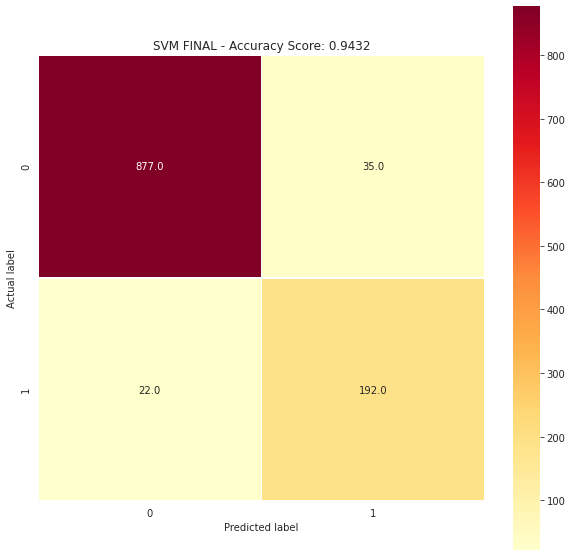

In [ ]:
# Visualize confusion matrix - SVM Final

plt.figure(figsize=(10,10))
sns.heatmap(cm_svm_final, annot=True, fmt=".1f",
            linewidths=.5, square = True, cmap = 'YlOrRd');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = f'SVM FINAL - Accuracy Score: {score_svm:.4f}'
plt.title(all_sample_title);